# Postprocess OpenFAST results

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

%matplotlib inline

import postproamrwindsample_xarray as ppsample
import postproengine as ppeng
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml as yaml
    print("# Loaded ruamel.yaml")
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False} 
except:
    import yaml as yaml
    print("# Loaded yaml")
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    
if useruamel: Loader=yaml.load
else:         Loader=yaml.safe_load

# Loaded ruamel.yaml


In [3]:
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, g)
    return outstr

In [4]:
rundir='/gpfs/lcheung/HFM/exawind-benchmarks/NREL5MW_ALM_BD'
RESULTSDIR='../results/OpenFAST_out'

In [5]:
yamlstring="""
globalattributes:
  verbose: False
  udfmodules: []
  executeorder:
  - openfast
  - plotcsv
  
openfast:
# For FSI case
- name: NREL5MW
  filename: RUNDIR/T0_NREL5MW_v355/openfast-cpp/5MW_Land_DLL_WTurb_cpp/5MW_Land_DLL_WTurb_cpp.out
  vars:
  - Time
  - GenPwr
  - RotThrust
  - RotTorq
  - RotSpeed
  - BldPitch1
  output_dir: RESULTSDIR
  csv:  # Store information to CSV files
    individual_files: False

plotcsv:
  - name: Power
    xlabel: 'Time [s]'
    ylabel: 'Power [kW]'
    title: 'Turbine power'
    figsize: [10,3]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'RESULTSDIR/NREL5MW.csv', 'xcol':'Time', 'ycol':'GenPwr', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'NREL5MW ALM'}}    
    
  - name: Thrust
    xlabel: 'Time [s]'
    ylabel: 'RotThrust [kN]'
    title: 'Turbine thrust'
    figsize: [10,3]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'RESULTSDIR/NREL5MW.csv', 'xcol':'Time', 'ycol':'RotThrust', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'NREL5MW ALM'}}    

  - name: RPM
    xlabel: 'Time [s]'
    ylabel: 'RPM [rpm]'
    title: 'Rotor speed'
    figsize: [10,3]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'RESULTSDIR/NREL5MW.csv', 'xcol':'Time', 'ycol':'RotSpeed', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'NREL5MW ALM'}}    

  - name: Pitch
    xlabel: 'Time [s]'
    ylabel: 'Pitch [deg]'
    title: 'Blade pitch'
    figsize: [10,3]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'RESULTSDIR/NREL5MW.csv', 'xcol':'Time', 'ycol':'BldPitch1', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'NREL5MW ALM'}}    

  - name: RotTorque
    xlabel: 'Time [s]'
    ylabel: 'Torque'
    title: 'Rotor Torque'
    figsize: [10,3]
    legendopts: {'loc':'upper right'}
    csvfiles:
    - {'file':'RESULTSDIR/NREL5MW.csv', 'xcol':'Time', 'ycol':'RotTorq', 'lineopts':{'color':'b', 'lw':1, 'linestyle':'-', 'label':'NREL5MW ALM'}}    

"""
f = io.StringIO(stringReplaceDict(yamlstring, {'RUNDIR':rundir, 'RESULTSDIR':RESULTSDIR}))
yamldict = Loader(f, **loaderkwargs)

Initialized openfast
Running openfast
NREL5MW /gpfs/lcheung/HFM/exawind-benchmarks/NREL5MW_ALM_BD/T0_NREL5MW_v355/openfast-cpp/5MW_Land_DLL_WTurb_cpp/5MW_Land_DLL_WTurb_cpp.out
Initialized csv inside NREL5MW
Executing csv
Initialized plotcsv
Running plotcsv


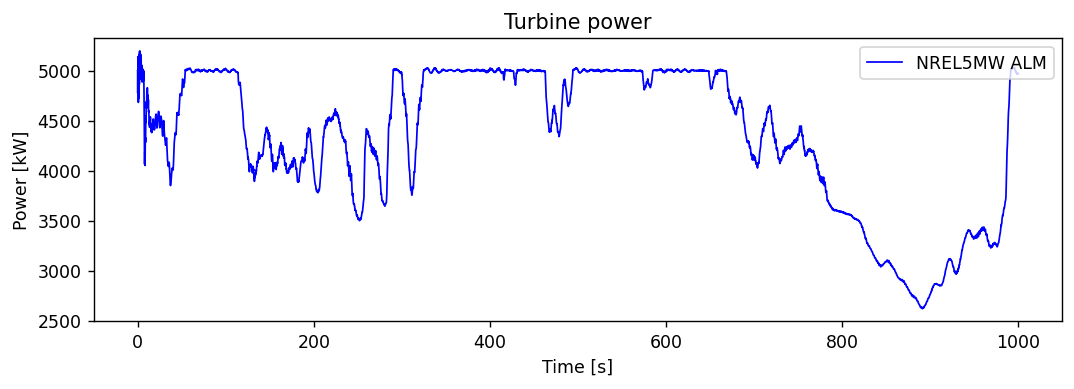

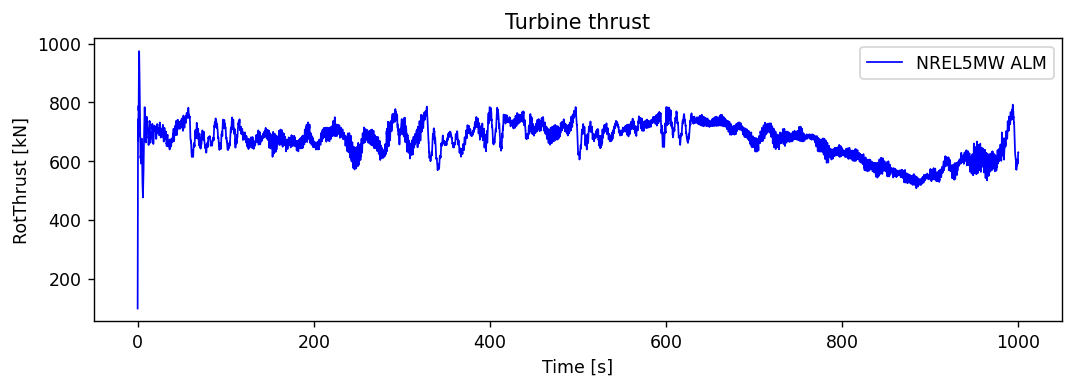

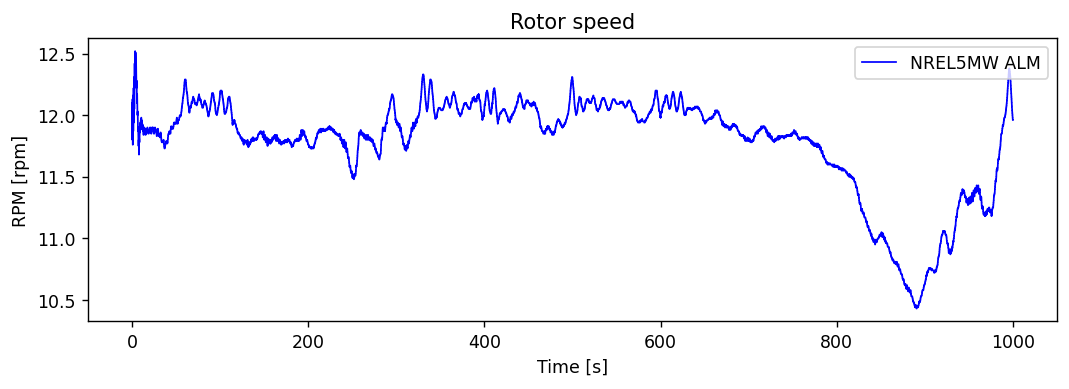

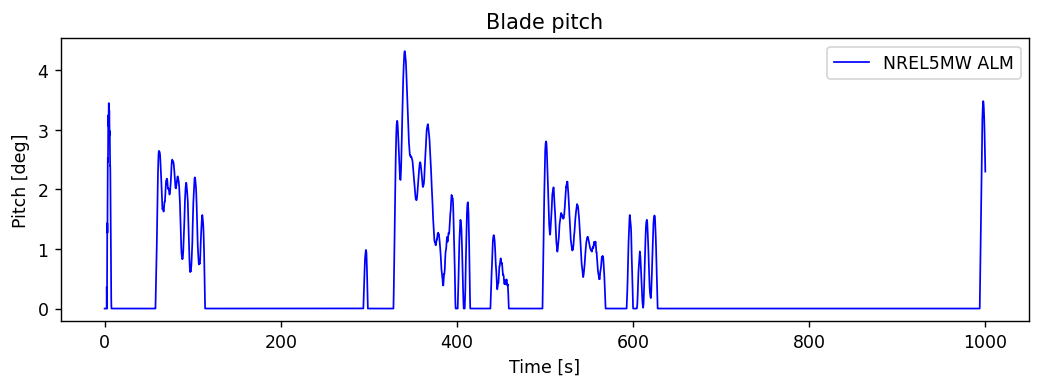

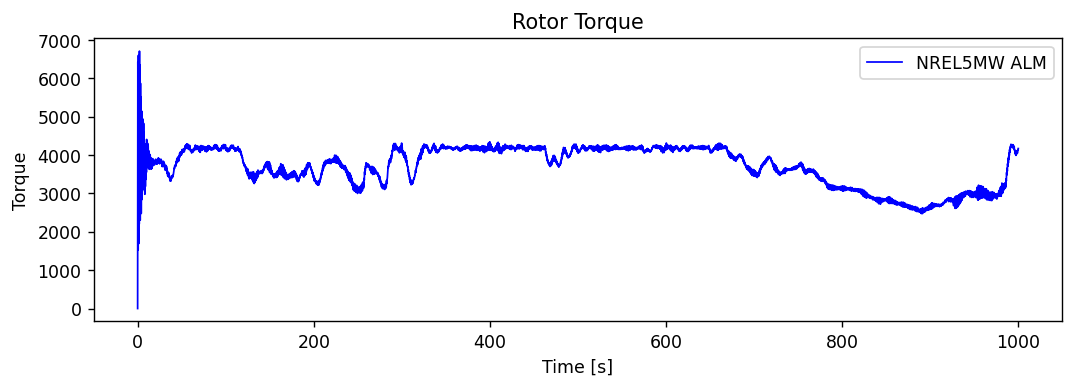

In [6]:
# Run the driver
ppeng.driver(yamldict, verbose=True)